In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [28]:
#New Project Adevertising#
data= pd.read_csv('Advertising (1).csv')


In [29]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [31]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [32]:
#checking the null values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [33]:
#checking the shape of dataset
data.shape

(200, 5)

<Axes: >

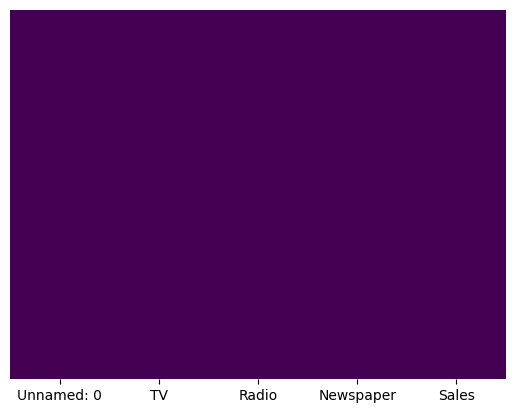

In [34]:
#Plotting missing values
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

No missing value are found in the above chart

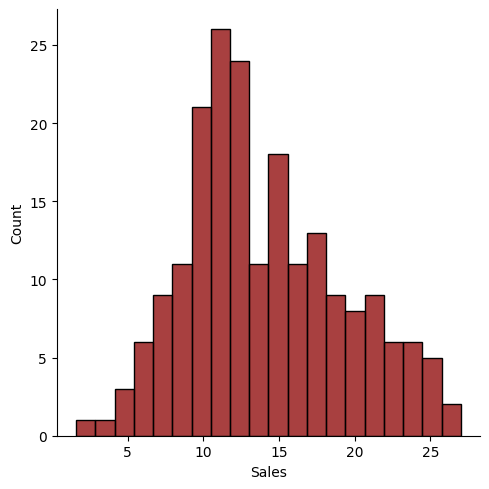

In [35]:
# Plotting the histogram to check the type of distribution
sns.displot(data['Sales'],kde=False,color='darkred', bins=20)


# It seems like a normal distribution

In [36]:
#Checking the columns of the dataset
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [37]:
#creating the variables features
features = ['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [38]:
#displaying features
data[features]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [39]:
#creating a duplicate dataset train1
data1 = data.copy()
data1 = data.drop(['Unnamed: 0'], axis = 1)

In [40]:
#checking the copied dataset
data1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


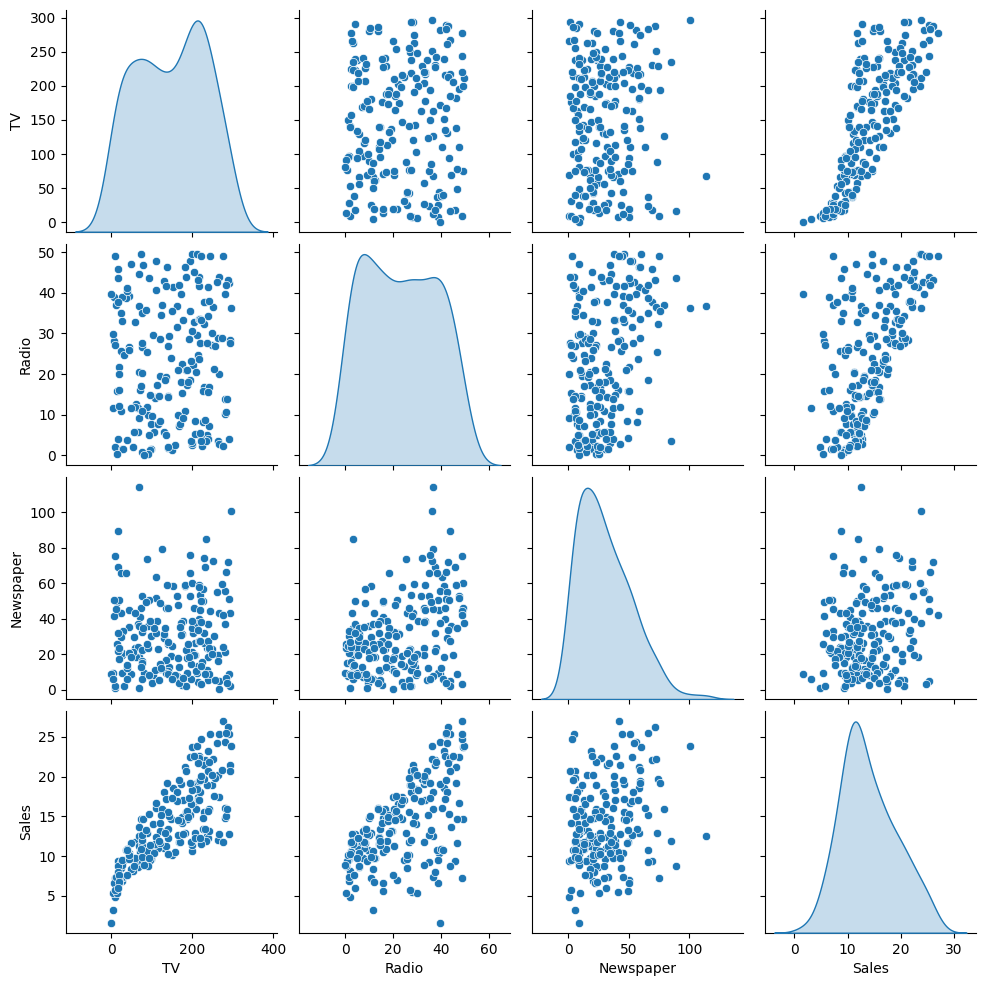

In [41]:
# Multivariate analysis

sns.pairplot(data1, x_vars = data1.iloc[:, :], y_vars= data1.iloc[:, :], kind = 'scatter', diag_kind = 'kde')

# From the pairplot it can be observed that TV plays a major role in increase of sales.

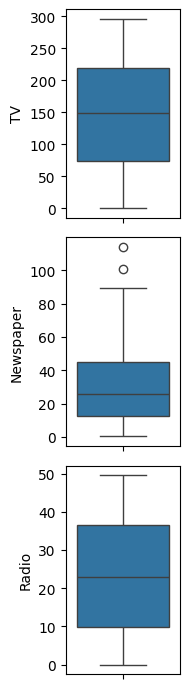

In [42]:
##plotting boxplot in order to get the outliers present in the dataset
fig, axs = plt.subplots(3, figsize = (2,7))
plt1 = sns.boxplot(y= data1['TV'], orient = "v", ax = axs[0])
plt2 = sns.boxplot(y= data1['Newspaper'],orient = "v", ax = axs[1])
plt3 = sns.boxplot(y = data1['Radio'], orient = "v", ax = axs[2])
plt.tight_layout()

In [44]:
#Describing the dataset again to validate the percentiles with the boxplot
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Sales'>

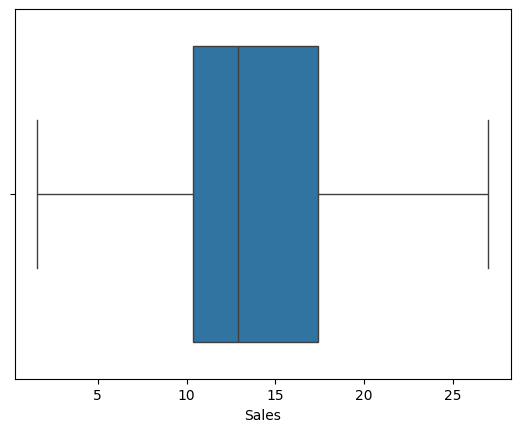

In [45]:
# Univariate analysis
sns.boxplot(x = data1['Sales'])

<Axes: >

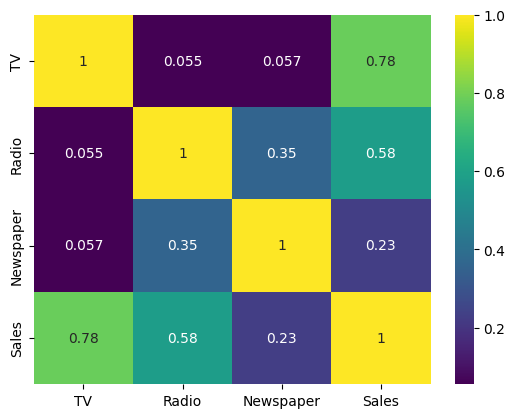

In [46]:
# Correlation between variables
sns.heatmap(data1.corr(), cmap ='viridis' , annot =True)

In [47]:
#dropping the sales columns from the independent columns data
X= data1.drop('Sales', axis=1)
y= data1[["Sales"]]

In [48]:
#Checking the first five rows of the independent features
X.head(10)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [49]:
#checking the first few rows of the dependent feature
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [50]:
#Appling linear regression on the whole dataset using sklearn
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [51]:
#fitting the model
model = lr.fit(X, y)

In [52]:

#getting the intercept of the model
model.intercept_

array([2.93888937])

In [53]:

#getting the coefficients of the model
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [54]:

#predicting the model 
model.predict(X)

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

In [55]:
#impoting class mean_squared_error to calculate the mean squared error
from sklearn.metrics import mean_squared_error

In [57]:

#calculating the mean squared error(MSE)
MSE= mean_squared_error(y, model.predict(X))
MSE

2.784126314510936

In [58]:
#calculating the root mean squared error(RMSE)
RMSE = np.sqrt(MSE)
RMSE

np.float64(1.6685701407225697)

In [60]:
#importing statsmodels library to perform linear regression using statsmodels library
import statsmodels.api as sm

In [62]:
#creating the model
lm= sm.OLS(y, X)
lm

In [63]:
#fitting the model
model= lm.fit()

In [64]:

#getting the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 03 Jan 2025   Prob (F-statistic):                   2.43e-171
Time:                        23:25:09   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [66]:
#checking first five rows of the independent features of the training set
X_train.head()

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [67]:
#checking first five rows of the independent features of the training set
y_train.head()

,Sales
116,12.2
67,13.4
78,5.3
42,20.7
17,24.4


In [68]:
#appling linear regression the the training set using sklearn
lm= LinearRegression()
model= lm.fit(X_train, y_train)

In [70]:

#predicting X_train and calculating the root mean squared error(RMSE) on the training set
predictions = model.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train, predictions))
RMSE

np.float64(1.7897255222345272)

In [71]:
#Predicting X_test
predictions1 = model.predict(X_test)

In [73]:
#calculating the root mean squared error(RMSE) on the test set
RMSE = np.sqrt(mean_squared_error(y_test, predictions1 ))
RMSE

np.float64(1.388857410775697)

In [74]:
#checking the accuracy of the model
r2_score = model.score(X_test,y_test)
print(r2_score*100,'%')


92.24605706201434 %
